In [1]:
! pip install datasets transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 23.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (

In [2]:
from datasets import load_dataset

ds = load_dataset('jonathan-roberts1/RSSCN7')
ds

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/2800 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2800
    })
})

In [3]:
ex = ds['train'][400]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400>,
 'label': 1}

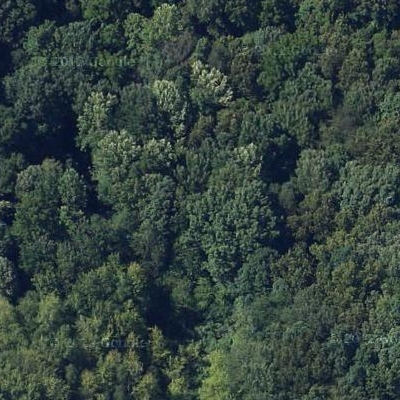

In [4]:
image = ex['image']
image

In [5]:
labels = ds['train'].features['label']
labels

ClassLabel(names=['field', 'forest', 'grass', 'industry', 'parking', 'resident', 'river or lake'], id=None)

In [6]:
labels.int2str(ex['label'])

'forest'

Filter:   0%|          | 0/2800 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2800 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2800 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2800 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2800 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2800 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2800 [00:00<?, ? examples/s]

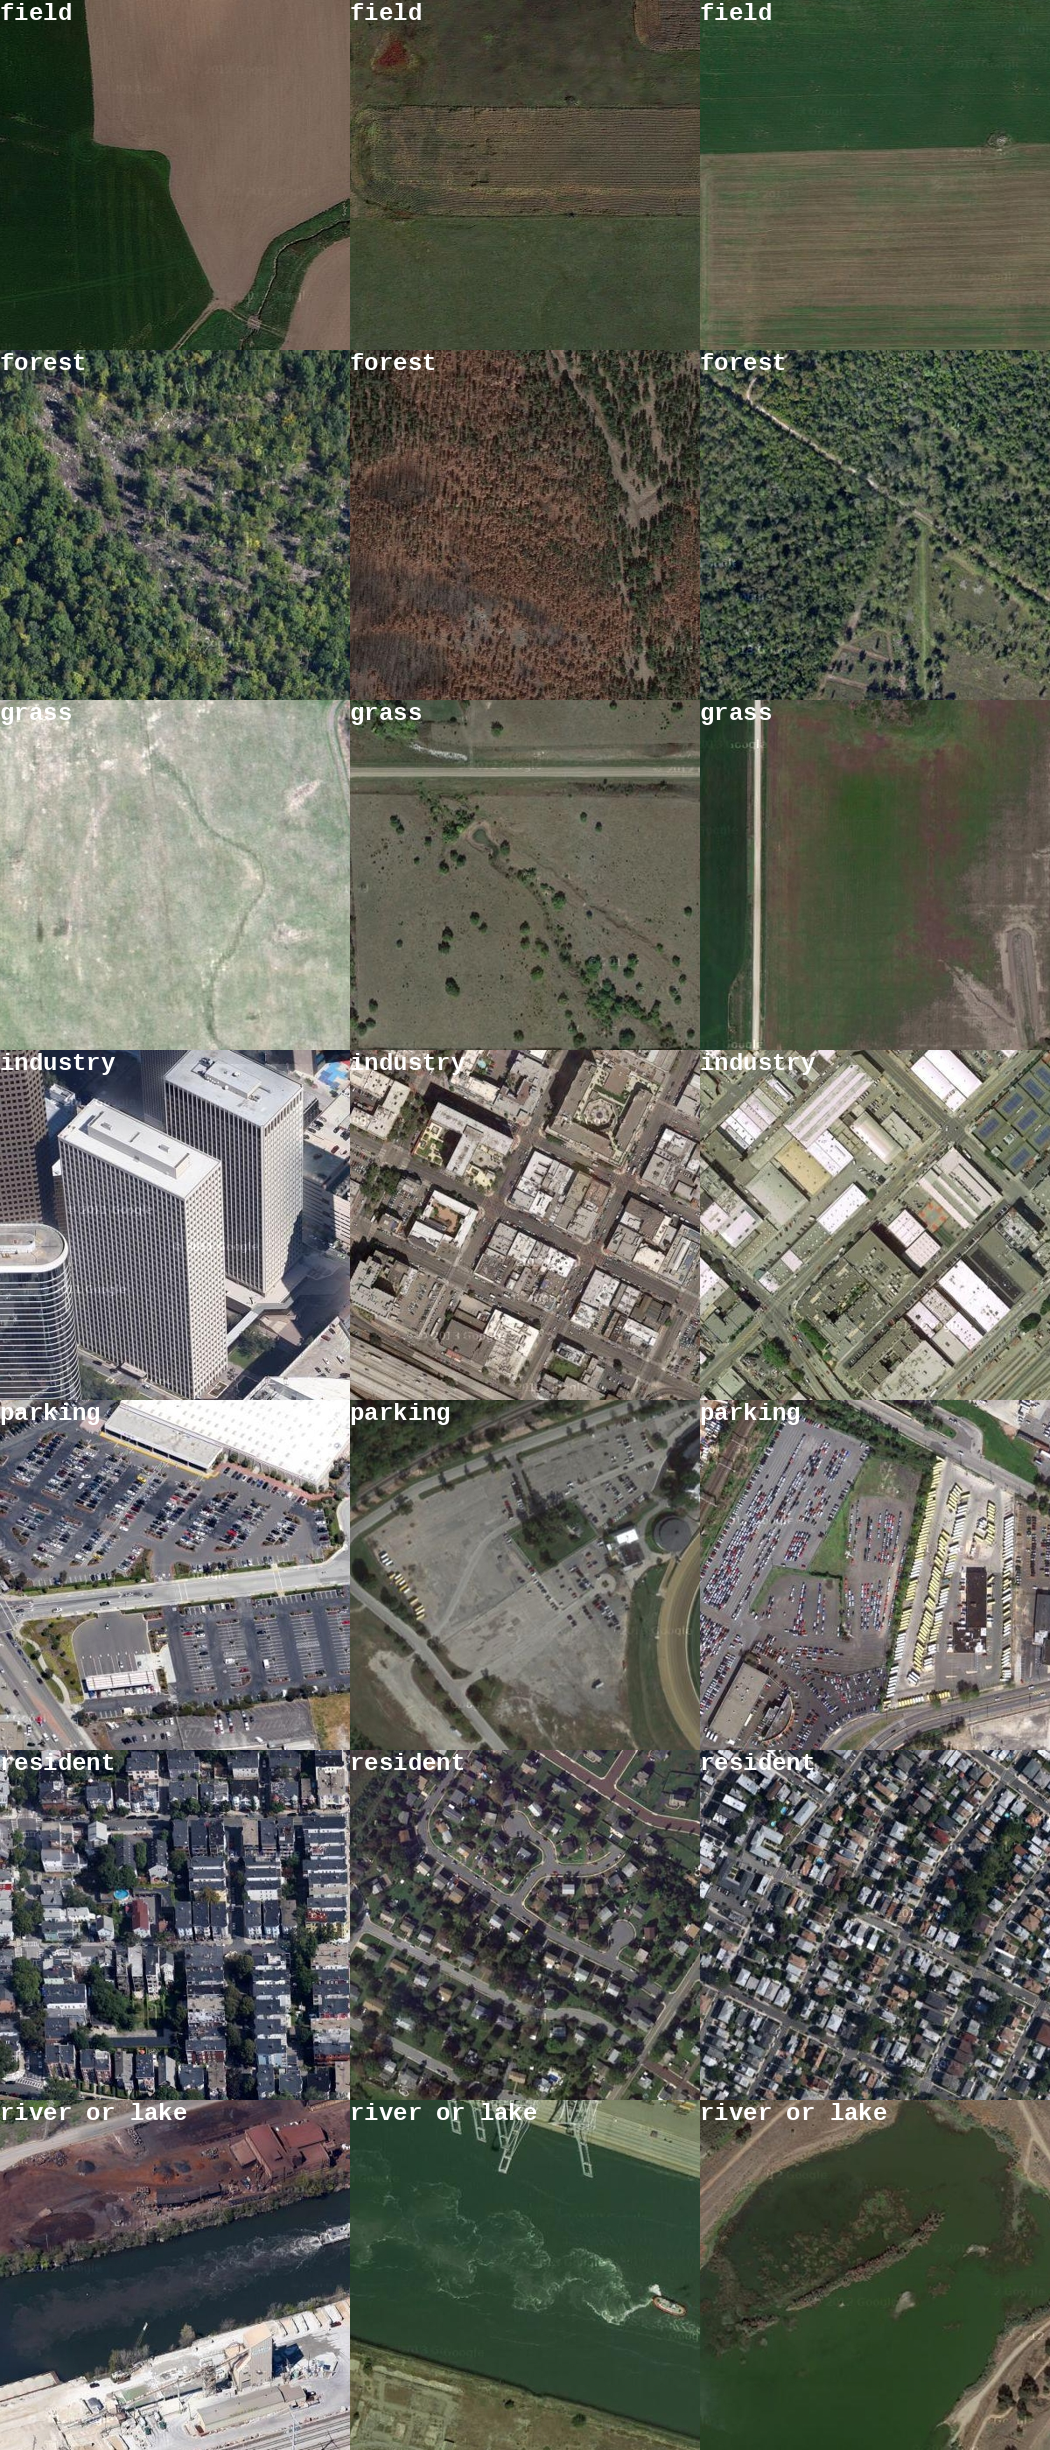

In [7]:
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['label'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 24)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['label'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), font=font)

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)

In [8]:
from transformers import AutoFeatureExtractor

#loading the feature extractor
model_name= 'microsoft/swin-base-patch4-window7-224'
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x.convert('RGB') for x in example_batch['image']], return_tensors='pt')
    inputs['label'] = example_batch['label']
    return inputs

# applying transform
prepared_ds = ds.with_transform(transform)

preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [9]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[-1.5357, -1.6898, -1.6898,  ..., -1.5185, -1.8097, -1.5699],
          [-1.6555, -1.8097, -1.5870,  ..., -1.7754, -1.6898, -1.3644],
          [-1.7925, -1.2959, -1.3130,  ..., -1.4158, -1.8268, -1.7925],
          ...,
          [-0.4226, -1.1760, -1.7069,  ..., -1.3815, -1.5870, -1.7240],
          [-0.8335, -1.5014, -1.6898,  ..., -1.8268, -1.7069, -1.6042],
          [-1.3130, -0.7993, -1.1589,  ..., -1.5699, -1.2959, -1.5014]],

         [[-1.2479, -1.4230, -1.3880,  ..., -1.2654, -1.5630, -1.3179],
          [-1.3880, -1.5455, -1.2829,  ..., -1.5455, -1.4580, -1.1429],
          [-1.5280, -1.0203, -1.0028,  ..., -1.1604, -1.5980, -1.5805],
          ...,
          [-0.0049, -0.7927, -1.3354,  ..., -1.0553, -1.2654, -1.4055],
          [-0.4076, -1.1078, -1.3004,  ..., -1.5105, -1.3880, -1.2829],
          [-0.8978, -0.3901, -0.7752,  ..., -1.2479, -0.9678, -1.1779]],

         [[-0.8981, -1.0376, -1.0376,  ..., -0.8458, -1.0724, -0.7936],
          [-0

In [10]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[-0.3198, -0.4568, -0.2342,  ..., -0.1143, -0.0972,  0.0227],
          [-0.2856, -0.4226, -0.2513,  ..., -0.0972, -0.1143, -0.0629],
          [-0.1486, -0.3027, -0.3369,  ..., -0.0629, -0.0972, -0.0801],
          ...,
          [-0.3541, -0.2513, -0.1828,  ..., -0.3369, -0.3541, -0.3027],
          [-0.5253, -0.6452, -0.5596,  ..., -0.1999, -0.4568, -0.2684],
          [-0.9020, -0.8678, -0.7479,  ..., -0.1486, -0.3369, -0.1999]],

         [[-0.4601, -0.5826, -0.3200,  ..., -0.1800, -0.1625, -0.0399],
          [-0.4251, -0.5476, -0.3550,  ..., -0.1625, -0.1800, -0.1275],
          [-0.2850, -0.4426, -0.4426,  ..., -0.1275, -0.1625, -0.1450],
          ...,
          [ 0.1176,  0.2752,  0.3803,  ..., -0.4076, -0.4251, -0.3725],
          [-0.0749, -0.1450, -0.0049,  ..., -0.2675, -0.5301, -0.3375],
          [-0.4776, -0.4076, -0.2150,  ..., -0.2150, -0.4076, -0.2675]],

         [[-0.2881, -0.3927, -0.0964,  ...,  0.0082,  0.0256,  0.1476],
          [-0

In [11]:
import torch

def collate_fn(batch):
  #data collator
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [12]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
  # function which calculates accuracy for a certain set of predictions
  return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

<ipython-input-12-6effe46d2a76>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [13]:
from transformers import SwinForImageClassification, Trainer, TrainingArguments

labels = ds['train'].features['label'].names

# initialzing the model
model = SwinForImageClassification.from_pretrained(
    model_name,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)},
    ignore_mismatched_sizes = True,
)

config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/352M [00:00<?, ?B/s]

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([7, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
from transformers import Trainer, TrainingArguments

batch_size = 16
# Defining training arguments (set push_to_hub to false if you don't want to upload it to HuggingFace's model hub)
training_args = TrainingArguments(
    f"swin-finetuned-food101",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [15]:
prepared_ds=prepared_ds['train'].train_test_split(test_size=0.2)
prepared_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2240
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 560
    })
})

In [17]:
!pip install huggingface_hub

In [18]:
from huggingface_hub import notebook_login

notebook_login()

In [19]:
# Instantiate the Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["test"],
    tokenizer=feature_extractor,
)

In [20]:
try:
  train_results = trainer.train()
  trainer.save_model()
  trainer.log_metrics("train", train_results.metrics)
  trainer.save_metrics("train", train_results.metrics)
  trainer.save_state()
except ValueError:
  pass

***** train metrics *****
  epoch                    =         3.0
  total_flos               = 490353665GF
  train_loss               =      0.3446
  train_runtime            =  0:05:49.85
  train_samples_per_second =      19.208
  train_steps_per_second   =         0.3


In [21]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        3.0
  eval_accuracy           =     0.9661
  eval_loss               =     0.1004
  eval_runtime            = 0:00:11.14
  eval_samples_per_second =     50.249
  eval_steps_per_second   =      3.141


In [22]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'jonathan-roberts1/RSSCN7',
    "tags": ['Remote-sensing'],
}

if training_args.push_to_hub:
    trainer.push_to_hub('🍻 cheers', **kwargs)
else:
    trainer.create_model_card(**kwargs)

events.out.tfevents.1718353966.2a32240208ad.845.1:   0%|          | 0.00/405 [00:00<?, ?B/s]

In [23]:
trainer.push_to_hub('SeyedAli/Remote-Sensing-Image-Classification-Swin-Transformer')

CommitInfo(commit_url='https://huggingface.co/SeyedAli/swin-finetuned-food101/commit/94e721fa0fcf2d42e6521637f35e11da5ecbee76', commit_message='SeyedAli/Remote-Sensing-Image-Classification-Swin-Transformer', commit_description='', oid='94e721fa0fcf2d42e6521637f35e11da5ecbee76', pr_url=None, pr_revision=None, pr_num=None)

In [24]:
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

def batch_transform(examples):
    # take a list of PIL images and turn into pixel values
    inputs = feature_extractor([x for x in examples['image']], return_tensors='pt')
    # add the labels in
    inputs['label'] = examples['label']

    return inputs
transformed_data = ds.with_transform(batch_transform)

zero_loader = DataLoader(transformed_data['train'], batch_size=16)
zero_pred = []
for batch in tqdm(zero_loader):
    with torch.no_grad():
        logits = model(batch['pixel_values'].to('cuda')).logits
        pred = logits.argmax(-1).cpu().detach().tolist()
        zero_pred += [labels[i] for i in pred]

  0%|          | 0/175 [00:00<?, ?it/s]

In [32]:
labels = ds['train'].features['label']
zero_true = [labels.int2str(i) for i in ds['train']['label']]

In [34]:
labels = ['field', 'forest', 'grass', 'industry', 'parking', 'resident', 'river or lake']

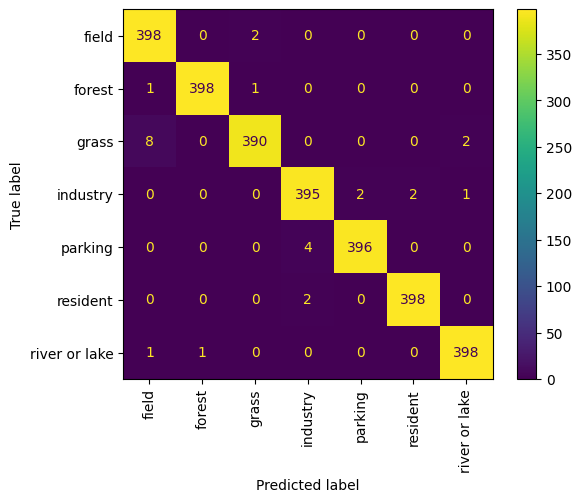

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
import matplotlib.pyplot as plt
cm = confusion_matrix(zero_true, zero_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot(xticks_rotation = 'vertical')
plt.show()